Project 1

In [148]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform, sample
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import tree


In [149]:
#Setting Working Directory
os.chdir("C:\Data\Project")
#os.getcwd()

In [150]:
#importing training data as df and backing it up as train_data
df = pd.read_csv("train.csv")
train_data=df

In [151]:
#Missing value Analysis
missing_val=pd.DataFrame(train_data.isnull().sum())
#missing_val.sum()
#As there are no missing values, we are skipping missing value replacement

In [152]:
#Convert target to categorical variable
train_data['target']=train_data['target'].astype(object)
#train_data['target']


In [153]:
#Selecting Continous and Categorical variables for future use
#numeric_index = train_data.select_dtypes(include=np.number)
numeric_index = train_data._get_numeric_data()

#numeric_index
categorical_index = train_data.select_dtypes(include=np.object)
#categorical_index


In [154]:
#Outlier Analysis
%matplotlib inline  
#plt.boxplot(train_data['var_1'])
for i in numeric_index.columns:
    #print(i)
    q75, q25 = np.percentile(train_data.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    #print(min)
    #print(max)

    train_data = train_data.drop(train_data[train_data.loc[:,i] < min].index)
    train_data = train_data.drop(train_data[train_data.loc[:,i] > max].index)

In [155]:
#train_data.shape
#df
#missing_val
#numeric_index.columns

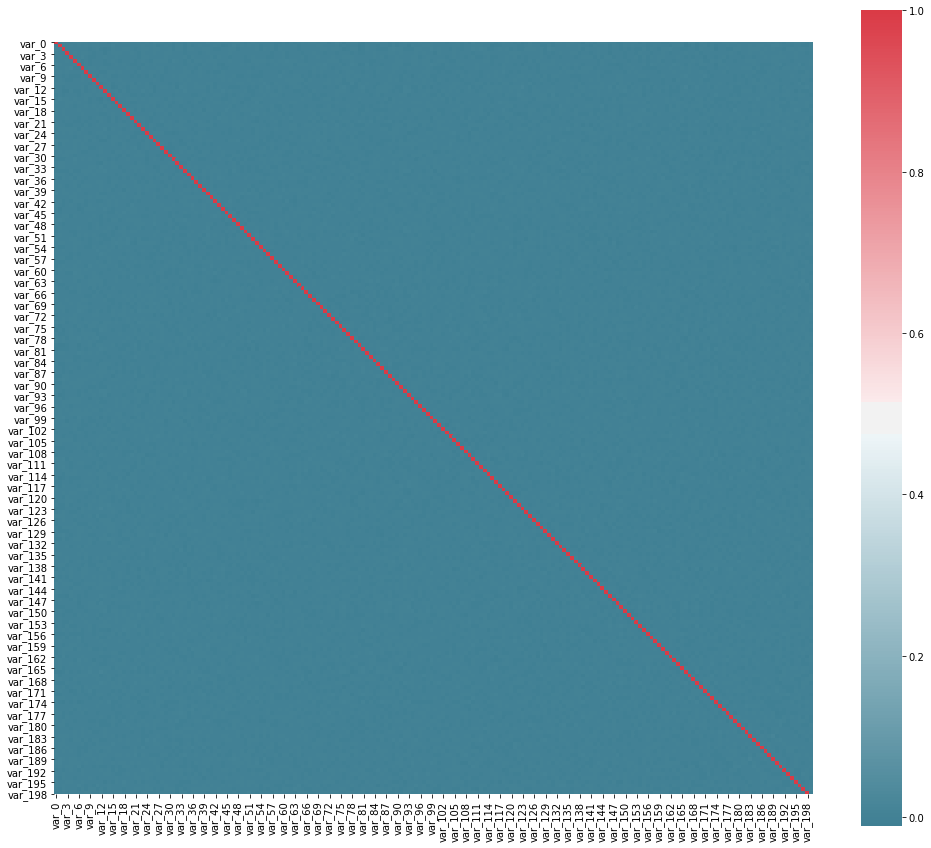

In [156]:
#Feature Selection
#Correlation plot
df_corr = train_data.loc[:,numeric_index.columns]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(17, 15))

#Generate correlation matrix
corr = train_data.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#From the heat map it is evident that all variables are not corelated with each other, hence doesnt need any feature selection

In [157]:
#Feature Scaling
#Normalisation
for i in numeric_index.columns:
    #print(i)
    #print(train_data[i])
    mini=np.min(train_data[i])
    maxi=np.max(train_data[i])
    train_data[i] = (train_data[i] - mini)/(maxi - mini)

#train_data=train_data.drop(columns=['ID_code'])
#train, test = train_test_split(train_data, test_size=0.5)


In [158]:
#sampling
#number of 1s in target is 17103
#number of 0s in target is 157970
#From the above it is clear that the data is imbalanced, hence ML algorithms may not yield good results

ones = len(train_data[train_data['target']==1])
zeros = len(train_data[train_data['target']==0])

index_ones=train_data[train_data['target']==1].index
index_zeros=train_data[train_data['target']==0].index
#ones
#zeros

In [159]:
#Trying under-sampling of major data
#random_indices = np.random.choice(index_zeros, ones,replace='False')
#random_indices
#under_sample_indices = np.concatenate([index_ones,random_indices])
#us_train_data = train_data.loc[under_sample_indices]
#us_train_data

In [160]:
#trying over sampling
ones_sample = train_data[train_data['target']==1].sample(zeros, replace=True)
df_zero = train_data[train_data['target']==0]
over_sample_df = pd.concat([ones_sample,df_zero], axis=0)
over_sample_class_counts=pd.value_counts(over_sample_df['target'])
#over_sample_class_counts.plot(kind='bar')
#plt.xlabel = 'Class'
#plt.ylabel = 'Frequency'
us_train_data = over_sample_df
#print(number_fraud)
#print(number_non_fraud)
#492
#284315
#over_sample_class_counts
#pd.value_counts(ones_sample['target'])

In [161]:
train_data=us_train_data
train_data=train_data.drop(columns=['ID_code'])
train, test = train_test_split(train_data, test_size=0.2)
#LogisticRegression

y_train=train['target']
x_train=train.iloc[:,1:201]
#print(y)
#type(y)
y_train=y_train.astype('int')
#Regression
scaler = StandardScaler()
x_std = scaler.fit_transform(x_train)

########
clf = LogisticRegression(random_state=0, class_weight='balanced')

# Train model
model = clf.fit(x_std, y_train)

y_test=test['target']
x_test=test.iloc[:,1:201]
#print(y)
y_test=y_test.astype('int')
ynew = model.predict(x_test)
CM = pd.crosstab(y_test, ynew)
#let us save TP, TN, FP, FN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [162]:
#Error Metrics-Logistic Regression and undersampling of data
#Accuracy=64.09 which is ok
#FNR is 0% which is good
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
Accuracy_LR=((TP+TN)*100)/(TP+TN+FP+FN)
#True negative rate
TN*100/(TN+FP)
#Recall:
#Recall is positive cases correctly identified
TP*100/(TP+FN)
#False Positive rate:
#Number of false positives predicted:
FP*100/(FP+TN)
#False Negative rate:
#Number of false negatives predicted
FNR_LR=FN*100/(FN+TP)
#FNR_LR
#Accuracy_LR
print("Logistic Regression")
print("Accuracy is " + str(Accuracy_LR))
print("False Negative Rate is " + str(FNR_LR))

Logistic Regression
Accuracy is 65.2813825409888
False Negative Rate is 2.8275182087083746


In [163]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(x_test)




In [164]:
#Create dot file to visualise tree  #http://webgraphviz.com/
train_data_1=train_data.drop(columns=['target'])
dotfile = open("pt.dot", 'w')
df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = train_data_1.columns)

In [165]:
#Error Metrics
#Accuracy=94.519 which is good
#FNR is 2.49% which is good
CM = pd.crosstab(y_test, C50_Predictions)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
Accuracy_DT=((TP+TN)*100)/(TP+TN+FP+FN)
#True negative rate
TN*100/(TN+FP)
#Recall:
#Recall is positive cases correctly identified
TP*100/(TP+FN)
#False Positive rate:
#Number of false positives predicted:
FP*100/(FP+TN)
#False Negative rate:
#Number of false negatives predicted
FNR_DT=FN*100/(FN+TP)
#FNR_LR
#Accuracy_DT
print("Decision Tree")
print("Accuracy is " + str(Accuracy_DT))
print("False Negative Rate is " + str(FNR_DT))

Decision Tree
Accuracy is 94.51161612964486
False Negative Rate is 0.028625043732705704


In [166]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(x_train, y_train)
RF_Predictions = RF_model.predict(x_test)



In [167]:
#Error Metrics
#Accuracy=99% is good
#FNR is 0% is good
CM = pd.crosstab(y_test, RF_Predictions)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
Accuracy_RF=((TP+TN)*100)/(TP+TN+FP+FN)
#True negative rate
TN*100/(TN+FP)
#Recall:
#Recall is positive cases correctly identified
TP*100/(TP+FN)
#False Positive rate:
#Number of false positives predicted:
FP*100/(FP+TN)
#False Negative rate:
#Number of false negatives predicted
FNR_RF=FN*100/(FN+TP)
#FNR_RF
#Accuracy_RF
print("Random Forest")
print("Accuracy is " + str(Accuracy_RF))
print("False Negative Rate is " + str(FNR_RF))

Random Forest
Accuracy is 99.91928847249478
False Negative Rate is 0.03816672497694094


In [168]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(x_train, y_train)
NB_Predictions = NB_model.predict(x_test)

In [169]:
#Error Metrics
#Accuracy=80.61 is good
#FNR is 19.99% which is better
CM = pd.crosstab(y_test, NB_Predictions)
print(CM)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
Accuracy_NB=((TP+TN)*100)/(TP+TN+FP+FN)
#True negative rate
TN*100/(TN+FP)
#Recall:
#Recall is positive cases correctly identified
TP*100/(TP+FN)
#False Positive rate:
#Number of false positives predicted:
FP*100/(FP+TN)
#False Negative rate:
#Number of false negatives predicted
FNR_NB=FN*100/(FN+TP)
#FNR_NB
#Accuracy_NB
print("Naive Bayes")
print("Accuracy is " + str(Accuracy_NB))
print("False Negative Rate is " + str(FNR_NB))

col_0       0      1
target              
0       25851   5896
1        6186  25255
Naive Bayes
Accuracy is 80.87928087611571
False Negative Rate is 19.674946725613054
